In [25]:
import cv2
import numpy as np
import addSrcToPath
import random

import dataloader.elipsesEq as elipsesEq
# import drawElipses
from importlib import reload

from tqdm import tqdm
imageOriginal = cv2.imread('test1.jpg')

from matplotlib import pyplot as plt
import numpy as np

In [1011]:
a = np.zeros((1, 3))
np.append( a, np.zeros((1, 3)), axis=0)
a

array([[0., 0., 0.]])

maxEle: 7.424082594995623
xl, yl: 128 128


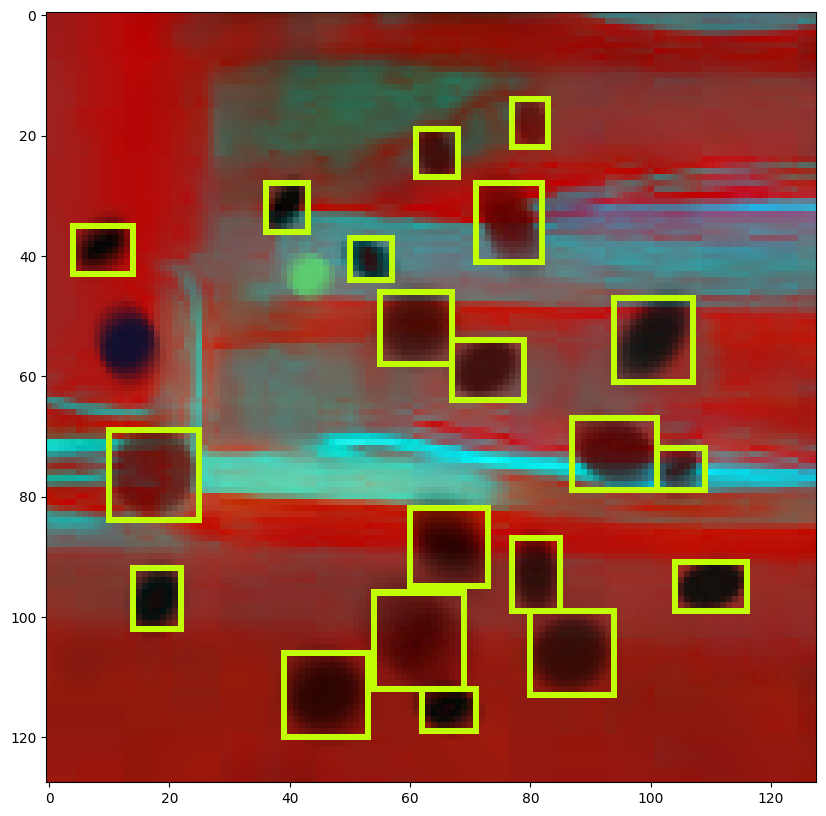

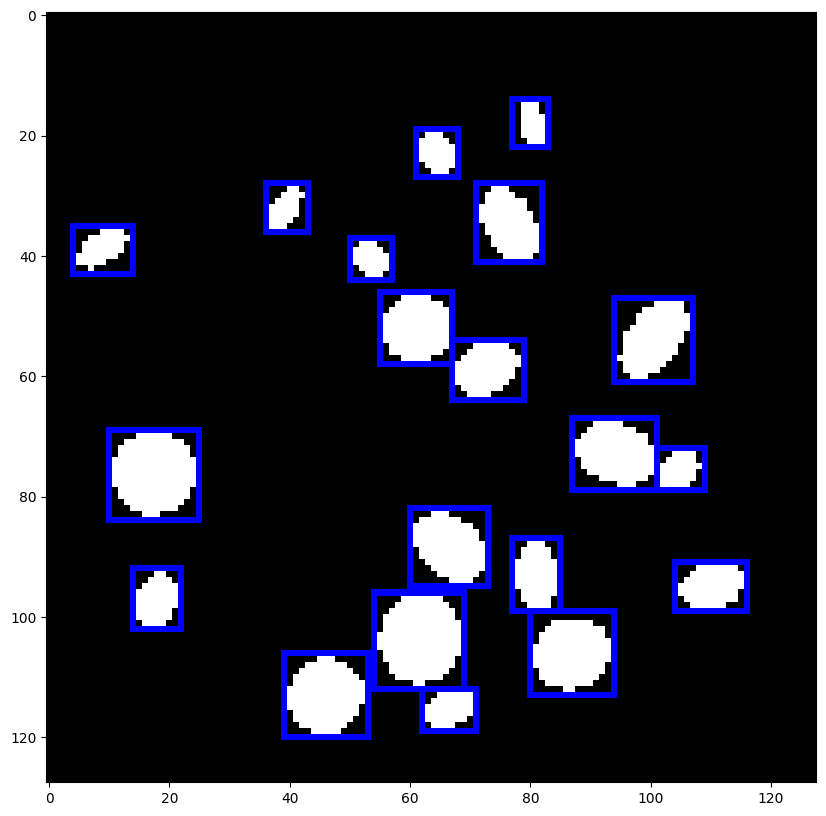

In [1015]:
# reload(elipsesEq)

dlCrop = 128

image = np.copy(imageOriginal)
xmin = random.randint(0, image.shape[0] - dlCrop)
ymin = random.randint(0, image.shape[1] - dlCrop)
crop256 = imageOriginal[xmin:xmin+dlCrop, ymin:ymin+dlCrop]

image, mask, bbox, c, bboxes, nexBoxes = elipsesEq.drawElipses(crop256)

clipMax = 0.5

bboxImage = bbox
bboxImageNorm = np.sqrt(bboxImage[:, :, 0]**2 + bboxImage[:, :, 1]**2)
# bboxImageNorm = np.sqrt(bboxImage[:, :, 1]**2 + bboxImage[:, :, 2]**2)
maxEle = np.max(bboxImageNorm)
print('maxEle:', maxEle)
bboxImage = bboxImageNorm/np.max(maxEle)

[xl, yl, _] = bbox.shape
print('xl, yl:', xl, yl)

originalMas = np.copy(mask)
# for xmin, ymin, xmax, ymax in bboxes:
# mask = cv2.rectangle(mask, (round(ymin - 0.5), round(xmin - 0.5)), (round(ymax - 0.5), round(xmax - 0.5)), (1,1,1), 1)
    # image = cv2.rectangle(image, (round(ymin - 0.5), round(xmin - 0.5)), (round(ymax - 0.5), round(xmax - 0.5)), (0,255,0), 1)

originalBbox = np.copy(bbox)
emptyBox = np.zeros([dlCrop, dlCrop, 3])

maskImage = mask
maskImage = np.stack([maskImage, maskImage, maskImage], axis = 2)

for i in range(xl):
    for j in range(yl):
      if originalMas[i, j] > 0:
        x0, y0, w, h = originalBbox[i, j]
        # print('ij, ===>', i, j)
        # print(x0, y0, w, h)
        x1 = (i - x0) - w/2
        y1 = (j - y0) - h/2
        x2 = (i - x0) + w/2
        y2 = (j - y0) + h/2
    
        # print(x1, y1, x2, y2, w, h)
        maskImage = cv2.rectangle(maskImage, (round(y1 - 0.5), round(x1 - 0.5)), (round(y2 + 0.5), round(x2 + 0.5)), (0,0,1), 1)
        image = cv2.rectangle(image, (round(y1 - 0.5), round(x1 - 0.5)), (round(y2 + 0.5), round(x2 + 0.5)), (0,255,0), 1)
        # emptyBox = cv2.rectangle(emptyBox, (round(y1 - 0.5), round(x1 - 0.5)), (round(y2 - 0.5), round(x2 - 0.5)), (0,255,0), 1)

# for box in nexBoxes:
#     maskImage = cv2.rectangle(maskImage, (round(box[1] - 1.5), round(box[0] - 1.5)), (round(box[3] + 2.5), round(box[2] + 5)), (0,1,0), 1)
    # image = cv2.rectangle(image, (round(box[1] - 1.5), round(box[0] - 1.5)), (round(box[3] + 2.5), round(box[2] + 5)), (0,255,0), 1)


image = np.abs(image - c)/255



bboxImage = np.stack([bboxImage, bboxImage, bboxImage], axis = 2)
# print('bboxImage.shape', bboxImage.shape)

def plotDraw(data):

    plotSize = 10
    plt.figure(figsize=(plotSize,plotSize))
    plt.imshow(data)
    plt.show()
    

plotDraw(image)
plotDraw(maskImage)
# plotDraw(emptyBox)
# image, maskImage, emptyBox



In [966]:
128/12

10.666666666666666

In [ ]:
cv2.imshow('original', cv2.resize(image, [1280, 1280//3]))
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()
print('c.osed')

# cv2.imshow('original', cv2.resize(bboxImage, [1280, 1280]))
# cv2.waitKey(0) # waits until a key is pressed
# cv2.destroyAllWindows()

# cv2.imshow('original', cv2.resize(mask, [1280, 1280]))
# cv2.waitKey(0) # waits until a key is pressed
# cv2.destroyAllWindows()
# loop = False